In [ ]:
# Performed in-line with the educational content of EDUREKA

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [ ]:
DS=pd.read_csv("/content/sample_data/AirPassengers.csv")
DS["Month"]=pd.to_datetime(DS["Month"],infer_datetime_format=True)
IDS=DS.set_index(["Month"])

In [ ]:
from datetime import datetime
IDS.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


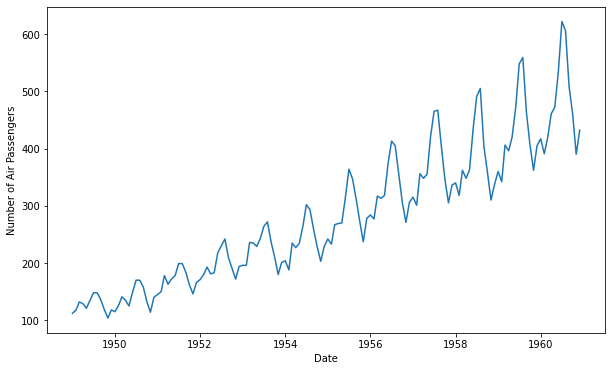

In [ ]:
plt.xlabel("Date")
plt.ylabel("Number of Air Passengers")
plt.plot(IDS)

In [ ]:
rolmean=IDS.rolling(window=12).mean()
rolstd=IDS.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


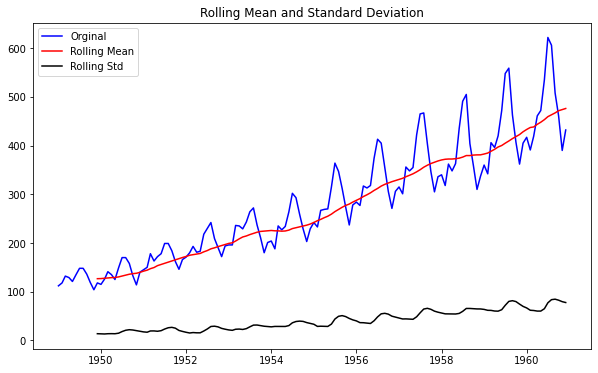

In [ ]:
orig=plt.plot(IDS,color='blue',label='Orginal')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

In [ ]:
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey-Fuller Test:")
dftest=adfuller(IDS['#Passengers'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','Number of observations used'])

Results of Dickey-Fuller Test:


In [ ]:
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key]=value
print(dfoutput)

Test Statistic                   0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


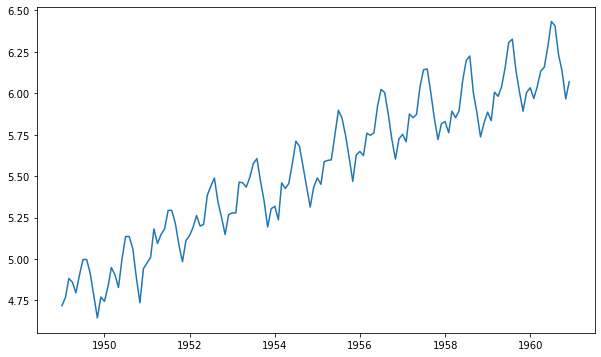

In [ ]:
# Estimating Trend
IDS_logscale=np.log(IDS)
plt.plot(IDS_logscale)

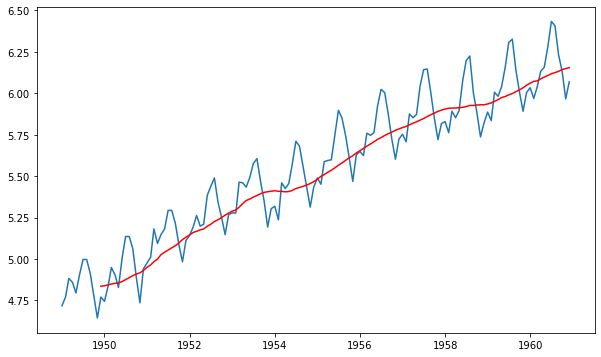

In [ ]:
movingAverage=IDS_logscale.rolling(window=12).mean()
movingSTD=IDS_logscale.rolling(window=12).std()
plt.plot(IDS_logscale)
plt.plot(movingAverage,color='red')

In [ ]:
datasetLogScaleMinusMovingAverage = IDS_logscale-movingAverage
datasetLogScaleMinusMovingAverage.head(15)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head()

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  movingAverage=timeseries.rolling(window=12).mean()
  movingSTD=timeseries.rolling(window=12).std()
  orig=plt.plot(timeseries,color='blue',label='Original')
  mean=plt.plot(movingAverage,color='red',label='Rolling Mean')
  std=plt.plot(movingSTD,color='black',label='Rolling Std')
  plt.legend(loc='best')
  plt.title("Rolling Mean & Standard Deviation")
  plt.show(block=False)
  print("Results of Dickey-Fuller Test:")
  dftest=adfuller(IDS['#Passengers'],autolag='AIC')
  dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags used','Number of observations used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
  print(dfoutput)

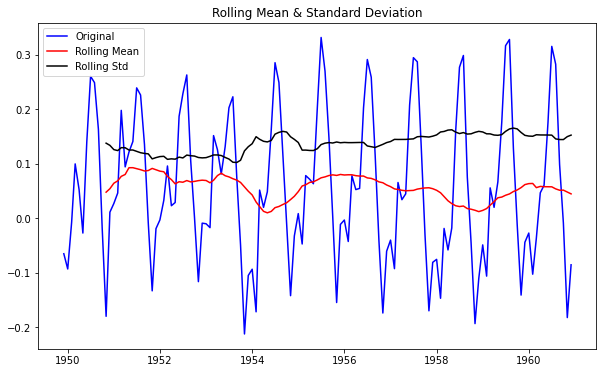

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingAverage)

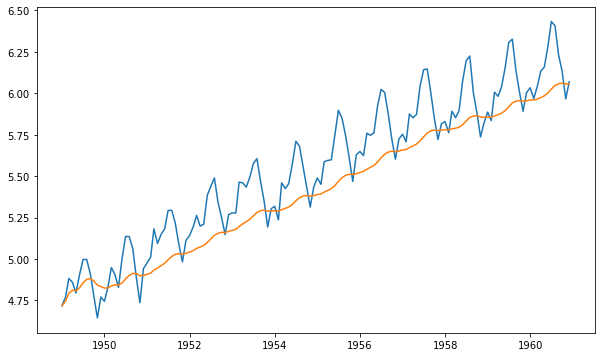

In [ ]:
exponentialDecayWeightedAverage=IDS_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(IDS_logscale)
plt.plot(exponentialDecayWeightedAverage)

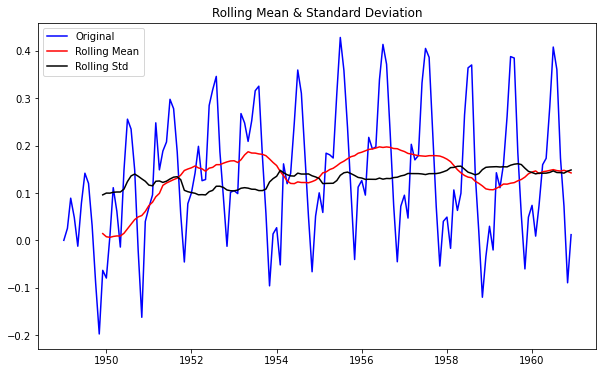

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
datasetLogScaleMinusMovingExponentialDecayAverage = IDS_logscale-exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

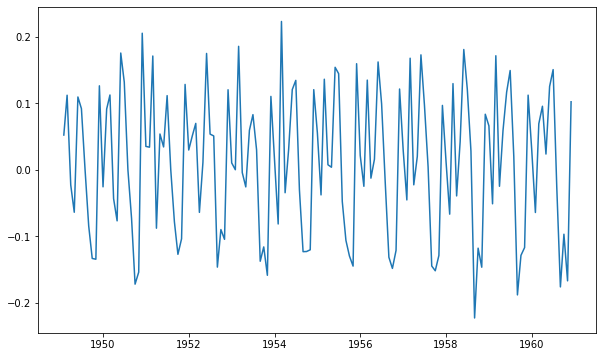

In [ ]:
datasetLogDiffShifting = IDS_logscale - IDS_logscale.shift(1)
plt.plot(datasetLogDiffShifting)

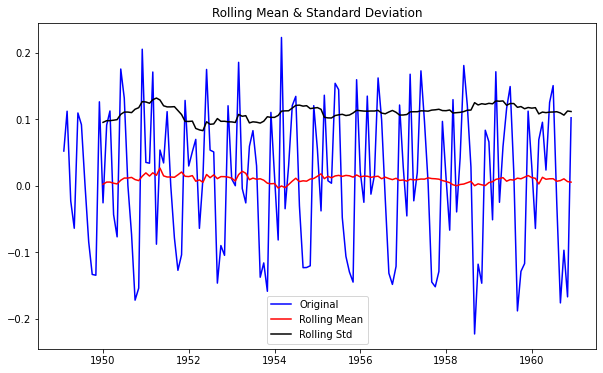

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

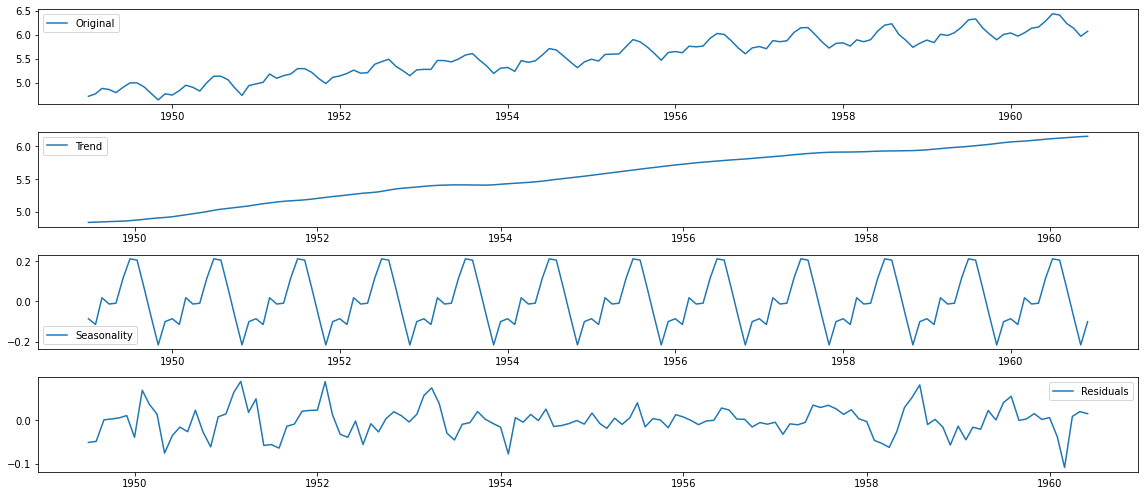

In [ ]:
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(IDS_logscale)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.figure(figsize=(16,7))
fig=plt.figure(1)
plt.subplot(411)
plt.plot(IDS_logscale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()



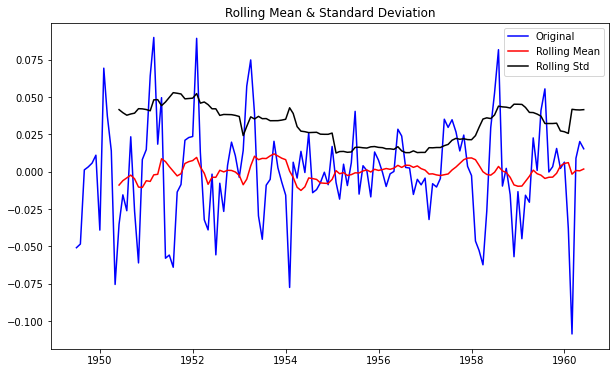

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags used                      13.000000
Number of observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [ ]:

decomposedLogData=residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

In [ ]:
from statsmodels.tsa.stattools import acf,pacf


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


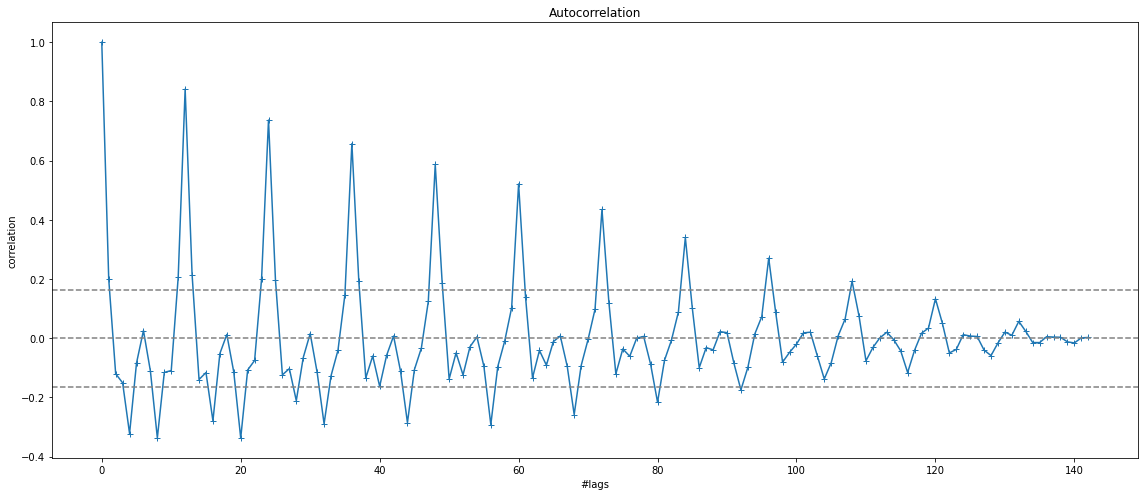

In [ ]:
# Auto collinearity function
ACF_lag=acf(datasetLogDiffShifting,nlags=200)
# Plot ACF
plt.figure(figsize=(16,7))
plt.plot(ACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()


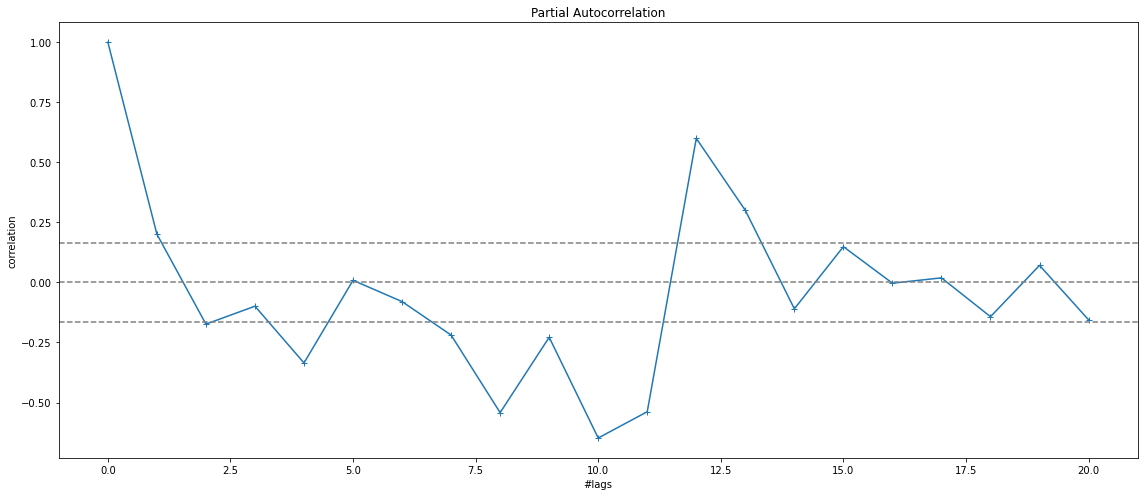

In [ ]:
PACF_lag=pacf(datasetLogDiffShifting,nlags=20,method='ols')
# Plot PACF
plt.figure(figsize=(16,7))
plt.plot(PACF_lag,marker='+')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation')
plt.xlabel('#lags')
plt.ylabel('correlation')
plt.tight_layout()


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

Plotting AR model


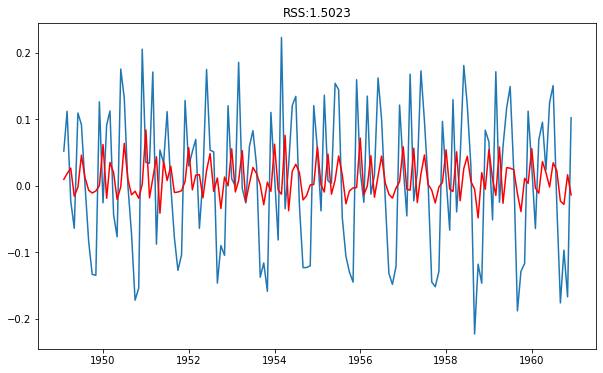

In [ ]:
# AR model
model=ARIMA(IDS_logscale,order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:%.4f'%sum((results_AR.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('Plotting AR model')


Plotting MA model


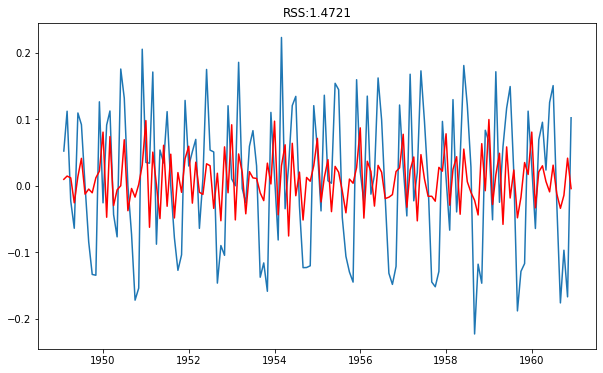

In [ ]:
# MA model
model=ARIMA(IDS_logscale,order=(0,1,2))
results_MA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS:%.4f'%sum((results_MA.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('Plotting MA model')


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

Plotting ARIMA model


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


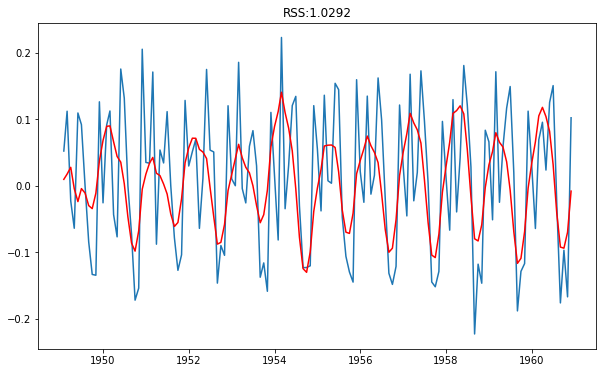

In [ ]:
# ARIMA model
model=ARIMA(IDS_logscale,order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS:%.4f'%sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print('Plotting ARIMA model')


In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [ ]:
predictions_ARIMA_log=pd.Series(IDS_logscale['#Passengers'][0],index=IDS_logscale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

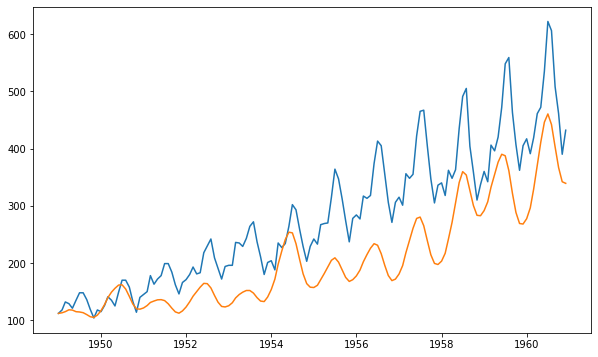

In [ ]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(IDS)
plt.plot(predictions_ARIMA)

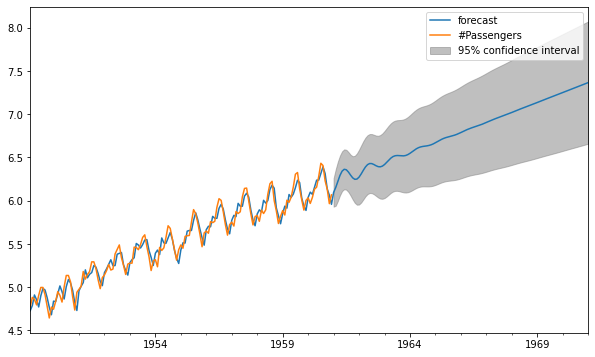

In [ ]:
results_ARIMA.plot_predict(1,264)
x=results_ARIMA.forecast(steps=120)

In [ ]:
results_ARIMA.forecast(steps=120)

(array([6.09553393, 6.15281404, 6.22442968, 6.29241104, 6.34164719,
        6.36359363, 6.35784685, 6.33139301, 6.29597534, 6.26447705,
        6.24738316, 6.25025162, 6.27275829, 6.30940308, 6.35151493,
        6.38988658, 6.41727385, 6.43011056, 6.42906688, 6.41842484,
        6.40456145, 6.39403603, 6.39183069, 6.40019491, 6.41833682,
        6.44295402, 6.46937433, 6.49293986, 6.5102412 , 6.51989033,
        6.52267575, 6.52112379, 6.51864515, 6.51853676, 6.52311908,
        6.53322348, 6.54812859, 6.5659155 , 6.58410304, 6.60036537,
        6.61313263, 6.62192776, 6.62737781, 6.63093118, 6.63438676,
        6.63937971, 6.64696491, 6.65739828, 6.67015314, 6.68414243,
        6.69806619, 6.71077895, 6.72157725, 6.73033975, 6.737498  ,
        6.74386366, 6.75037309, 6.75782578, 6.76668668, 6.7769981 ,
        6.78841307, 6.80032843, 6.81207185, 6.8230875 , 6.83307126,
        6.84202481, 6.85022299, 6.85811207, 6.86617325, 6.87479136,
        6.88416288, 6.8942637 , 6.90487876, 6.91